## NYCDSA Project Python - Webscraping StreetEasy Rental Apartment Listings for East Village, Manhattan, New York, NY, USA

## Webscraping from StreetEasy

In [3]:
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

# addr = address
# price = $ Price
# bdrm = # of bed rooms
# bath = # of bath rooms
# sqft = # Square footage, if data available

listings = pd.DataFrame()

# def listingScrape(listings, webpage):
def listingScrape(webpage):
    # Local use only
    with open(webpage) as webpage:
        soup = BeautifulSoup(webpage, "html.parser")
    # Web-scrape only
    #     response = requests.get(webpage) #, headers=headers)
    #     webtags = response.content
    #     soup = BeautifulSoup(webtags, "html.parser")
    listings = pd.DataFrame()
    ids=[]
    for listID in soup.find_all('a', {"id": re.compile('^add_folder_entry_Rental_')}):
        ids.append(listID['data-item-id'])
    for divLayer in soup.find_all('div', class_="listingCardBottom listingCardBottom-rental"):
        for nestedU in divLayer.find_all('div', class_="listingCardBottom--upperBlock"):
            addr = nestedU.a.text
            listID = nestedU.a.label
            price = nestedU.span.text
            price = int(''.join(re.findall(r'\d', price)))
        bdrm = bath = []
        sqft = np.nan
        for nestedL in divLayer.find_all('div', class_="listingCardBottom--lowerBlock"):
            for data in nestedL.find_all('span', {'class':"listingDetailDefinitionsIcon listingDetailDefinitionsIcon--bed"}):
                bdrm = data.find_next('span', {'class':"listingDetailDefinitionsText"}).text
                if any(chr.isdigit() for chr in bdrm):
                    bdrm = int(''.join(re.findall(r'\d', bdrm)))
                else:
                    bdrm = 0
            for data in nestedL.find_all('span', {'class':"listingDetailDefinitionsIcon listingDetailDefinitionsIcon--bath"}):
                bath = data.find_next('span', {'class':"listingDetailDefinitionsText"}).text
                bath = float(''.join(re.findall(r'\d', bath)))
                if bath > 10:
                    bath = bath/10
            if (nestedL.find('span', {'class':"listingDetailDefinitionsIcon listingDetailDefinitionsIcon--measure"}) != 0):
                for data in nestedL.find_all('span', {'class':"listingDetailDefinitionsIcon listingDetailDefinitionsIcon--measure"}):
                    sqft = data.find_next('span', {'class':"listingDetailDefinitionsText"})
                    sqft = int(''.join(re.findall(r'\d', sqft.text)))
                print("Price:", price, "\nAddr:", addr, "\nRooms:", bdrm, "\nBath:", bath, "\nSqFt:", sqft)
            else:
                print("Price:", price, "\nAddr:", addr, "\nRooms:", bdrm, "\nBath:", bath)
            listings = listings.append({'Address': addr, 'Rental Price': price, 'Rooms': bdrm, 'Bath': bath, 'SQFT': sqft},ignore_index=True)
    listings['ID'] = ids
    listings = listings[['ID','Address', 'Rental Price', 'Rooms', 'Bath', 'SQFT']]
    return listings

In [4]:
comp_listings = pd.DataFrame()
webpages=[]

pagesTotal = 31
for items in list(range(1,pagesTotal+1)):
#     page = 'https://streeteasy.com/for-rent/east-village?page='+str(items) 
    page = 'data_streeteasy_xtra/test_page'+str(items)+'.htm'
    webpages.append(page)
webpages

['data_streeteasy_xtra/test_page1.htm',
 'data_streeteasy_xtra/test_page2.htm',
 'data_streeteasy_xtra/test_page3.htm',
 'data_streeteasy_xtra/test_page4.htm',
 'data_streeteasy_xtra/test_page5.htm',
 'data_streeteasy_xtra/test_page6.htm',
 'data_streeteasy_xtra/test_page7.htm',
 'data_streeteasy_xtra/test_page8.htm',
 'data_streeteasy_xtra/test_page9.htm',
 'data_streeteasy_xtra/test_page10.htm',
 'data_streeteasy_xtra/test_page11.htm',
 'data_streeteasy_xtra/test_page12.htm',
 'data_streeteasy_xtra/test_page13.htm',
 'data_streeteasy_xtra/test_page14.htm',
 'data_streeteasy_xtra/test_page15.htm',
 'data_streeteasy_xtra/test_page16.htm',
 'data_streeteasy_xtra/test_page17.htm',
 'data_streeteasy_xtra/test_page18.htm',
 'data_streeteasy_xtra/test_page19.htm',
 'data_streeteasy_xtra/test_page20.htm',
 'data_streeteasy_xtra/test_page21.htm',
 'data_streeteasy_xtra/test_page22.htm',
 'data_streeteasy_xtra/test_page23.htm',
 'data_streeteasy_xtra/test_page24.htm',
 'data_streeteasy_xtra/te

In [5]:
comp_listings = pd.DataFrame()
for webpage in webpages:
    comp_listings = comp_listings.append(listingScrape(webpage), ignore_index=True)
print(comp_listings)

Price: 5375 
Addr: 250 E Houston Street #5G 
Rooms: 1 
Bath: 1.0 
SqFt: nan
Price: 7700 
Addr: 250 E Houston Street #PHE 
Rooms: 2 
Bath: 2.0 
SqFt: 941
Price: 2000 
Addr: 78 East Third Street #1R 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2100 
Addr: 531 East 6th Street #D3 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 7700 
Addr: 250 E Houston Street #PHE 
Rooms: 2 
Bath: 2.0 
SqFt: 941
Price: 2175 
Addr: 234 East 7th Street #4RW 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2200 
Addr: 106 East 7th Street #BE 
Rooms: 1 
Bath: 1.0 
SqFt: nan
Price: 2250 
Addr: 424 East 14th Street #3B 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2495 
Addr: 52 Saint Marks Place #4D 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2300 
Addr: 114 East 1st Street #1 
Rooms: 1 
Bath: 1.0 
SqFt: nan
Price: 2300 
Addr: 230 East 2nd Street #3D 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2300 
Addr: 219 Avenue A #2FS 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2395 
Addr: 226 East 14th Street #5P 
Rooms: 0 
Bath: 1.0 
SqFt: nan
Price: 2395 
Addr: 515

In [6]:
# Savings csv
comp_listings.info()
# comp_listings.to_csv('rentlistings_eastvillage_20221208.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            434 non-null    object 
 1   Address       434 non-null    object 
 2   Rental Price  434 non-null    float64
 3   Rooms         434 non-null    float64
 4   Bath          434 non-null    float64
 5   SQFT          83 non-null     float64
dtypes: float64(4), object(2)
memory usage: 20.5+ KB


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'ID'}>],
       [<AxesSubplot:title={'center':'Rental Price'}>,
        <AxesSubplot:title={'center':'Rooms'}>],
       [<AxesSubplot:title={'center':'Bath'}>,
        <AxesSubplot:title={'center':'SQFT'}>]], dtype=object)

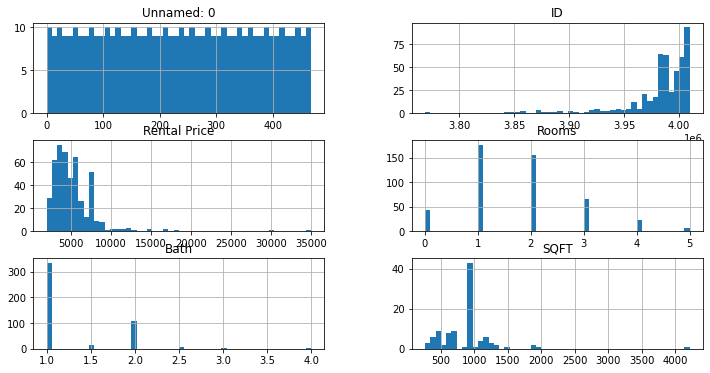

In [7]:
# Loading csv
comp_listings = pd.read_csv('rentlistings_eastvillage_20221208.csv')
# comp_listings.info()

# comp_listings.loc[comp_listings['Rooms'] ==0].hist(bins=50, figsize=(12,6))
# comp_listings.loc[comp_listings['Rooms'] ==1].hist(bins=50, figsize=(12,6))
# comp_listings.loc[comp_listings['Rooms'] ==2].hist(bins=50, figsize=(12,6))
# comp_listings.loc[comp_listings['Rooms'] ==3].hist(bins=50, figsize=(12,6))
# comp_listings.loc[comp_listings['Rooms'] ==4].hist(bins=50, figsize=(12,6))
# comp_listings.loc[comp_listings['Rooms'] ==5].hist(bins=50, figsize=(12,6))
comp_listings.hist(bins=50, figsize=(12,6))

In [8]:
comp_listings.describe()

,Unnamed: 0,ID,Rental Price,Rooms,Bath,SQFT
count,469.000000,4.690000e+02,469.000000,469.000000,469.000000,102.000000
mean,234.000000,3.983986e+06,5238.319829,1.705757,1.296375,897.980392
std,135.532899,2.963516e+04,2884.603040,1.053479,0.507010,462.590210
min,0.000000,3.769073e+06,2000.000000,0.000000,1.000000,263.000000
25%,117.000000,3.980445e+06,3500.000000,1.000000,1.000000,650.000000
50%,234.000000,3.987761e+06,4600.000000,2.000000,1.000000,941.000000
75%,351.000000,4.003516e+06,6000.000000,2.000000,2.000000,941.000000
max,468.000000,4.009503e+06,35000.000000,5.000000,4.000000,4217.000000


In [9]:
categorical = ['Rental Price', 'Rooms', 'Bath', 'SQFT']

for feature in categorical:
    print(comp_listings[feature].value_counts())
    print('')

7700.0     38
5375.0     36
3800.0     12
3000.0     11
4000.0      9
           ..
4595.0      1
4150.0      1
4095.0      1
3975.0      1
35000.0     1
Name: Rental Price, Length: 178, dtype: int64

1.0    177
2.0    155
3.0     65
0.0     44
4.0     22
5.0      6
Name: Rooms, dtype: int64

1.0    335
2.0    106
1.5     14
2.5      8
3.0      4
4.0      2
Name: Bath, dtype: int64

941.0     38
470.0      4
400.0      3
900.0      3
650.0      3
1200.0     3
700.0      3
962.0      2
1500.0     1
1104.0     1
702.0      1
723.0      1
1261.0     1
1000.0     1
1175.0     1
680.0      1
1327.0     1
1317.0     1
1900.0     1
2000.0     1
558.0      1
1265.0     1
1132.0     1
1195.0     1
1257.0     1
1112.0     1
1875.0     1
1149.0     1
735.0      1
633.0      1
556.0      1
431.0      1
440.0      1
263.0      1
357.0      1
349.0      1
500.0      1
340.0      1
675.0      1
370.0      1
683.0      1
1100.0     1
457.0      1
422.0      1
636.0      1
623.0      1
635.0      1
870

In [10]:
rentFeatures = comp_listings.copy()
rentFeatures.drop(['Rental Price','SQFT', 'ID','Address'], axis=1, inplace=True)
rentFeatures

,Unnamed: 0,Rooms,Bath
0,0,1.0,1.0
1,1,2.0,2.0
2,2,0.0,1.0
3,3,0.0,1.0
4,4,2.0,2.0
...,...,...,...
464,464,2.0,2.0
465,465,3.0,2.5
466,466,2.0,2.0
467,467,2.0,2.0


In [11]:
# Generate the boolean flags indicating missing rows and columns
# in panda dataframes, missing data is either 'None' singleton object or 'NaN' floating pt value
missingRows = rentFeatures.isnull().any(axis=1) # axis=1 rows, axis=0 columns
missingCols = rentFeatures.isnull().any(axis=0)
print("# MissingCols:", missingCols, "# MissingRows:", missingRows)

# MissingCols: Unnamed: 0    False
Rooms         False
Bath          False
dtype: bool # MissingRows: 0      False
1      False
2      False
3      False
4      False
       ...  
464    False
465    False
466    False
467    False
468    False
Length: 469, dtype: bool


(array([ 31., 377.,  54.,   2.,   3.,   0.,   0.,   0.,   1.,   1.]),
 array([-5206.32404592, -2206.86205692,   792.59993209,  3792.06192109,
         6791.52391009,  9790.98589909, 12790.4478881 , 15789.9098771 ,
        18789.3718661 , 21788.8338551 , 24788.29584411]),
 <BarContainer object of 10 artists>)

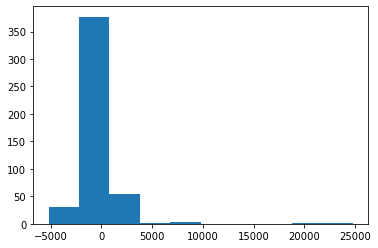

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rents = comp_listings['Rental Price']
lm.fit(rentFeatures, rents)
residuals = rents - lm.predict(rentFeatures)
plt.hist(residuals)

In [13]:
print('R^2 is equal to %.3f' %(lm.score(rentFeatures,rents)))
print('RSS is equal to %.3f' %(np.sum(residuals**2)) )
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.518
RSS is equal to 1877161731.400
The intercept is -9.568
The slopes are [   8.82657478  -65.88142547 2541.58438808]


In [14]:
# order is the order put into the data
print('negative slope column names %s' %(rentFeatures.columns[lm.coef_<0]))
print('positive slope column names %s' %(rentFeatures.columns[lm.coef_>0]))

negative slope column names Index(['Rooms'], dtype='object')
positive slope column names Index(['Unnamed: 0', 'Bath'], dtype='object')


(array([  4.,   8.,  52., 228., 121.,  31.,  20.,   3.,   0.,   2.]),
 array([-0.79045818, -0.58935163, -0.38824508, -0.18713853,  0.01396802,
         0.21507457,  0.41618112,  0.61728766,  0.81839421,  1.01950076,
         1.22060731]),
 <BarContainer object of 10 artists>)

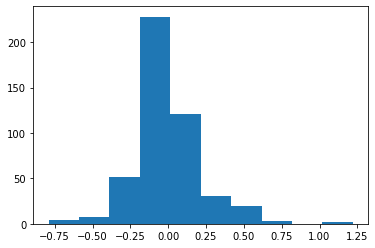

In [15]:
log_rents = np.log(rents)
lm.fit(rentFeatures,log_rents)
residuals = log_rents - lm.predict(rentFeatures)
plt.hist(residuals)

In [16]:
print('The R^2 of the new linear model is %.3f ' %(lm.score(rentFeatures, log_rents)))

The R^2 of the new linear model is 0.713 


In [17]:
scores = {} # dictionary of tuples, used to record the R^2 of each 3-feature combinations
# Note: dictionary doesnt have to be key/value pair, can be a tuple

cols = rentFeatures.columns
for index, feature1 in enumerate(cols):
        cols_minus_feature1 = cols[index+1:]
        for index, feature2 in enumerate(cols_minus_feature1):
            cols_minus_features1_and_2 = cols_minus_feature1[index+1:]
#             for _, feature3 in enumerate(cols_minus_features1_and_2):
            features = [feature1,feature2]
            y = np.log(rents)
            x = rentFeatures[features]
            lm3 = LinearRegression()
            lm3.fit(x,y)
            scores[tuple(features)] = lm3.score(x,y) #R^2
scores

{('Unnamed: 0', 'Rooms'): 0.5998425618463379,
 ('Unnamed: 0', 'Bath'): 0.7114526732790452,
 ('Rooms', 'Bath'): 0.5266680260355865}

In [18]:
# Another way,
from itertools import combinations
scores2 = {}

combos = combinations(rentFeatures.columns, 2)

for c in combos:
    X = rentFeatures[list(c)]
    Y = np.log(rents)
    reg = LinearRegression().fit(X,Y)
    scores2[c] = reg.score(X,Y)
scores2

{('Unnamed: 0', 'Rooms'): 0.5998425618463379,
 ('Unnamed: 0', 'Bath'): 0.7114526732790452,
 ('Rooms', 'Bath'): 0.5266680260355865}

In [19]:
# Find the 2-tuple with the highest $R^2$
sorted(
    scores.items(),
    key=lambda features_score: features_score[1],
    reverse=True
)

[(('Unnamed: 0', 'Bath'), 0.7114526732790452),
 (('Unnamed: 0', 'Rooms'), 0.5998425618463379),
 (('Rooms', 'Bath'), 0.5266680260355865)]

In [20]:
import statsmodels.api as sm
x = sm.add_constant(rentFeatures)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(log_rents, x)
results = model.fit()
results.summary() # How to print out the summary report

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Rental Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     384.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          1.59e-125
Time:                        01:48:22   Log-Likelihood:                 44.740
No. Observations:                 469   AIC:                            -81.48
Df Residuals:                     465   BIC:                            -64.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6244      0.029    265.118      0.000       7.568       7.681
Unnamed: 0     0.0016   9.41e-05     17.357      0.000       0.001       0.002
Rooms          0.0187      0.013      1.460      0.145      -0.006       0.044
Bath           0.3318      0.025     13.521      0.000       0.284       0.380
==============================================================================
Omnibus:                      106.944   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.955
Skew:                           0.939   Prob(JB):                    8.03e-101
Kurtosis:                       7.479   Cond. No.                         916.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues <= 0.05]
# pValues[pValues <= 0.05].index

The significant coefficients


const         0.000000e+00
Unnamed: 0    2.148652e-52
Bath          2.294249e-35
dtype: float64

In [22]:
print('The insignificant coefficients')
pValues[pValues >= 0.05]

The insignificant coefficients


Rooms    0.145099
dtype: float64

In [23]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_rent = pd.read_csv("data_streeteasy/medianAskingRent_All.csv", parse_dates = True)
df_rent = df_rent.dropna() # Drop rows  with NaN (empty) rents in any columns
# Select only areaType == neighborhood, dropping submarket, etc.
df_rent = df_rent[df_rent.areaType == 'neighborhood'] # success
df_rent.reset_index(drop=True, inplace=True)
numCol = len(df_rent.columns)
# print(numCol)
print(len(df_rent.index))

df_rent_chg = df_rent[df_rent.columns[3:]].copy()
df_rent_chg_shift = df_rent_chg.shift(periods=1, axis="columns", fill_value=0)

df_rent_chg = 100*(df_rent_chg - df_rent_chg_shift)/df_rent_chg_shift
df_rent_chg[df_rent_chg.columns[0]] = 0

df_rent.columns
df_rent_chg.insert(0, "areaType", df_rent["areaType"])
df_rent_chg.insert(0, "Borough", df_rent["Borough"])
df_rent_chg.insert(0, "areaName", df_rent["areaName"])
# df_rent_chg

df_rent_chg = df_rent_chg.transpose()
df_rent_chg.columns = df_rent_chg.iloc[0]
df_rent_chg = df_rent_chg.drop(index=['areaName','Borough','areaType'])
df_rent_chg.index = pd.to_datetime(df_rent_chg.index, format='%Y-%m')
# df_rent_chg
print(df_rent_chg.index.month) # Since Datetime object, successful

# df_rent_chg.head()
fig = plt.figure(figsize=(20,10)) # colors = np.random.rand(52)
# for i, (name, row) in enumerate(df_rent_chg.iterrows()):
#     plt.plot(row.index[i])
# #     plt.xlabel(name) #     plt.ylabel("MoM % change")
# #     plt.xlabel(df_rent_chg['areaName'])
#     plt.title('NYC Rental Prices 2010-2022, MoM % change')
# #     print(row[3:])
# #     row[3:].plot()
# plt.show()
#     print(row.index)
#     print(row[3:])
#     plt.plot(kind='line', y=row, figsize=(15,10))
#     sns.lineplot()
# df_rent.loc[ (df_rent['Borough'] == 'Manhattan') & (df_rent[])
# df_rent.loc[df_rent['Borough'] == 'Manhattan']
# df_rent_chg.plot(kind='line', figsize=[12,10])

# df_rent_chg
# plt.show()

52
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             4,  5,  6,  7,  8,  9, 10, 11, 12,  1],
           dtype='int64', length=145)


<Figure size 1440x720 with 0 Axes>

C:\Users\Varyag\AppData\Local\Temp/ipykernel_19156/3001207939.py:33: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_astoria, freq=1)


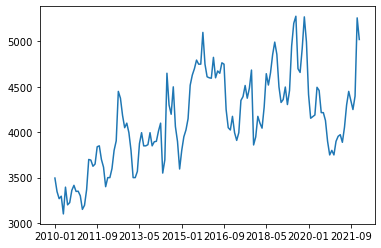

<Figure size 432x288 with 0 Axes>

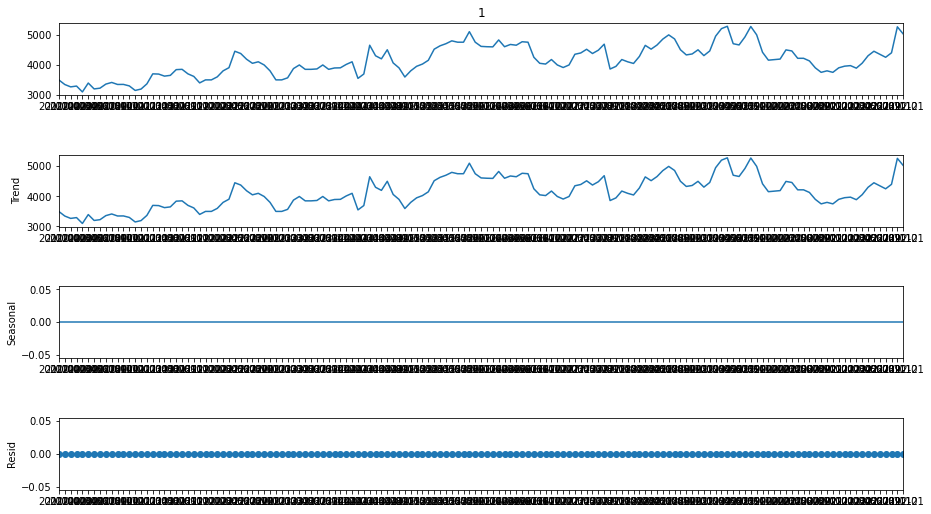

In [24]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# df_astoria = pd.DataFrame(df_rent.loc[df_rent['areaName'] == 'Astoria'])

df_astoria = df_rent.loc[1,df_rent.columns[3:]]
df_astoria.plot()
decomposition = seasonal_decompose(df_astoria, freq=1)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


In [25]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_rent_all    = pd.read_csv("data_streeteasy_xtra/medianAskingRent_All.csv", parse_dates = True)
df_rent_studio = pd.read_csv("data_streeteasy_xtra/medianASkingRent_Studio.csv", parse_dates = True)
df_rent_1      = pd.read_csv("data_streeteasy_xtra/medianASkingRent_OneBd.csv", parse_dates = True)
df_rent_2      = pd.read_csv("data_streeteasy_xtra/medianASkingRent_TwoBd.csv", parse_dates = True)
df_rent_3      = pd.read_csv("data_streeteasy_xtra/medianASkingRent_ThreePlusBd.csv", parse_dates = True)

# df_rent_all = dfCleanup(df_rent_all) # print(" \nCount total NaN at each column in a DataFrame : \n\n", df_rent_all.isnull().sum())
# df_rent_studio = dfCleanup(df_rent_studio) # # print(" \nCount total NaN at each column in a DataFrame : \n\n", df_rent_studio.isnull().sum())
# df_rent_1 = dfCleanup(df_rent_1) # # print(" \nCount total NaN at each column in a DataFrame : \n\n", df_rent_1.isnull().sum()
# df_rent_2 = dfCleanup(df_rent_2) # # print(" \nCount total NaN at each column in a DataFrame : \n\n", df_rent_2.isnull().sum())
# df_rent_3 = dfCleanup(df_rent_3) # print(" \nCount total NaN at each column in a DataFrame : \n\n", df_rent_3.isnull().sum())

def dfCleanup(dataf):
    dataf = dataf.dropna() # Drop rows  with NaN (empty) rents in any columns
    # Select only areaType == neighborhood, dropping submarket, etc.
    dataf = dataf[dataf.areaType == 'neighborhood'] # success
    dataf.reset_index(drop=True, inplace=True)
    return dataf

df_comp = pd.DataFrame()
for index, row in df_rent_all.iterrows():
# for ind in df_rent_all.areaType:
    df_test = df_rent_studio.loc[df_rent_studio['areaName'] == row.areaName]
    df_test = df_test.append(df_rent_1.loc[df_rent_1['areaName'] == row.areaName])
    df_test = df_test.append(df_rent_2.loc[df_rent_2['areaName'] == row.areaName])
    df_test = df_test.append(df_rent_3.loc[df_rent_3['areaName'] == row.areaName])
    df_test = df_test.transpose()
    df_test = df_test.drop(['areaName', 'Borough','areaType'])
    df_test.columns=['Studio','1','2','3+'] # df_test.rename(columns = {df_test.columns[0]:'Studio'}, inplace=True)
    df_comp = df_comp.append([{'areaName': row.areaName, 'Borough': row.Borough, 'areaType': row.areaType, 'dfs': df_test}])
df_comp = df_comp.reset_index(drop=True)

In [26]:
df_comp.head(10)

,areaName,Borough,areaType,dfs
0,All Downtown,Manhattan,submarket,Studio 1 2 3+ 2010-0...
1,All Midtown,Manhattan,submarket,Studio 1 2 3+ 2010-0...
2,All Upper East Side,Manhattan,submarket,Studio 1 2 3+ 2010-...
3,All Upper Manhattan,Manhattan,submarket,Studio 1 2 3+ 2010-0...
4,All Upper West Side,Manhattan,submarket,Studio 1 2 3+ 2010-0...
5,Astoria,Queens,neighborhood,Studio 1 2 3+ 2010-0...
6,Auburndale,Queens,neighborhood,Studio 1 2 3+ 2010-01 NaN ...
7,Bath Beach,Brooklyn,neighborhood,Studio 1 2 3+ 2010-01 ...
8,Battery Park City,Manhattan,neighborhood,Studio 1 2 3+ 2010-...
9,Bay Ridge,Brooklyn,neighborhood,Studio 1 2 3+ 2010-0...


<AxesSubplot:title={'center':'All Downtown'}, ylabel='Monthly Rent, $'>

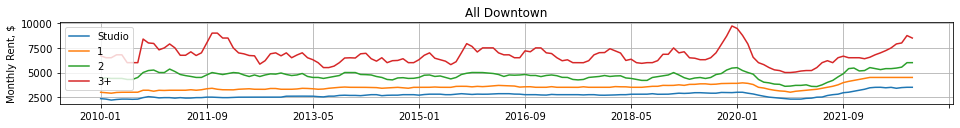

In [27]:
def dfSearchandPlot(dataf, nbrhood):
    idx = df_comp[df_comp['areaName']==nbrhood].index.to_list()[0]
    ax = dataf['dfs'][idx].plot(kind='line', figsize=(16,1.5), grid=True, ylabel='Monthly Rent, $', title=nbrhood)
    return ax

# Now possible to plot historic Studio/1->3 apartment listing prices for neighborhoods
dfSearchandPlot(df_comp, 'All Downtown')

## Time-series: Prepare Data, Analysis

In [28]:
# import eia
import pandas as pd
import matplotlib.pyplot as plt

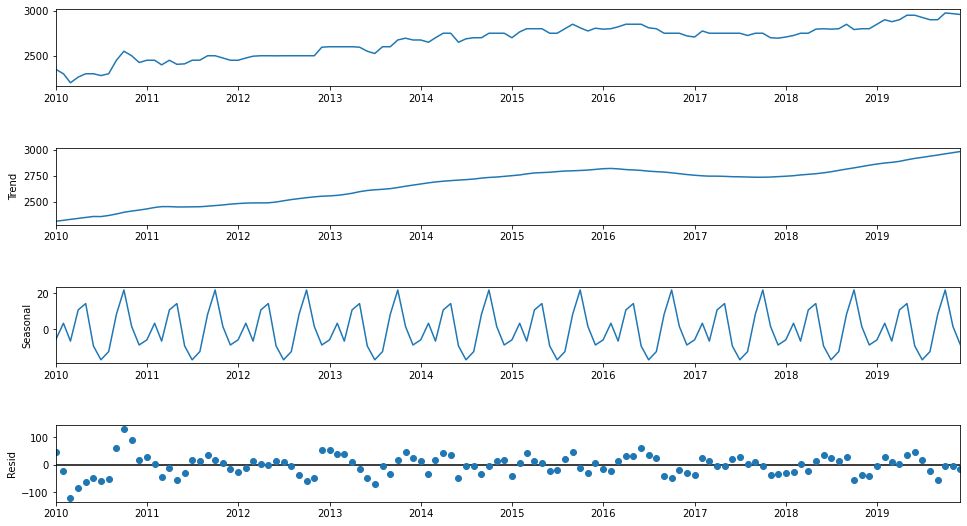

Seasonal 2010-01-01    -5.937603
2010-02-01     3.353160
2010-03-01    -6.643576
2010-04-01    10.788854
2010-05-01    14.350450
                ...    
2019-08-01   -12.500730
2019-09-01     8.343924
2019-10-01    21.934410
2019-11-01     1.541563
2019-12-01    -8.805450
Name: seasonal, Length: 120, dtype: float64 Trend 2010-01-01    2310.410014
2010-02-01    2319.627380
2010-03-01    2328.844746
2010-04-01    2338.062111
2010-05-01    2347.279477
                 ...     
2019-08-01    2935.832945
2019-09-01    2947.136412
2019-10-01    2958.439880
2019-11-01    2969.743347
2019-12-01    2981.046814
Name: trend, Length: 120, dtype: float64 Residuals 2010-01-01     45.527590
2010-02-01    -22.980540
2010-03-01   -122.201169
2010-04-01    -85.850965
2010-05-01    -61.629928
                 ...    
2019-08-01    -23.332215
2019-09-01    -55.480336
2019-10-01     -5.374290
2019-11-01     -4.284910
2019-12-01    -14.241364
Name: resid, Length: 120, dtype: float64


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

dts = pd.DataFrame(df_comp['dfs'][0].Studio)
dts = dts['2010-01':'2019-12']
dts.index = pd.to_datetime(dts.index, format='%Y-%m')
# dts.info()
# decompose_time_series(dts, 12) # Decompose the time series to determine seasonality/trend
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dts, model='additive',extrapolate_trend='freq')
ax = result.plot()
# ax.fig_size()
ax.set_size_inches(15, 8)
plt.show()
print('Seasonal', result.seasonal, 'Trend', result.trend, 'Residuals', result.resid)

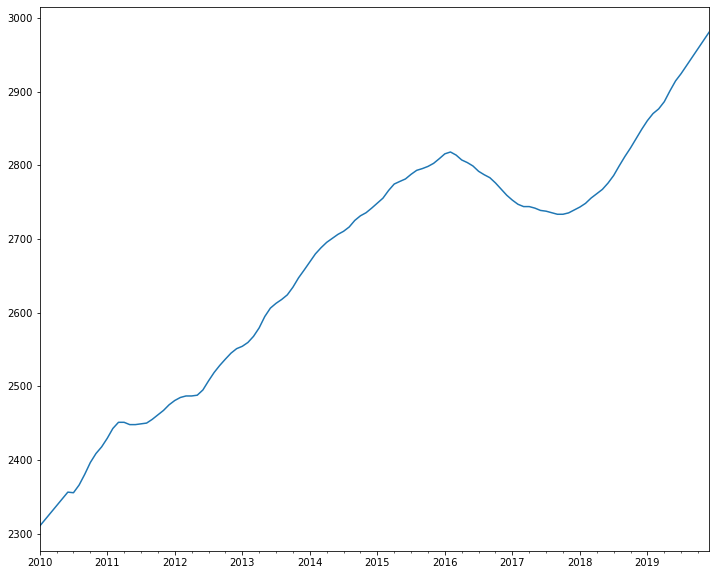

In [30]:
ax = result.trend.plot(figsize=[12,10])
# ax.figsize(15,8)

In [31]:
dts.loc['2010-01':'2022-11'].index.month_name() # Example of extracting the month name

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October',
       ...
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object', length=120)